In [33]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=32) # keep random state so we get the same values

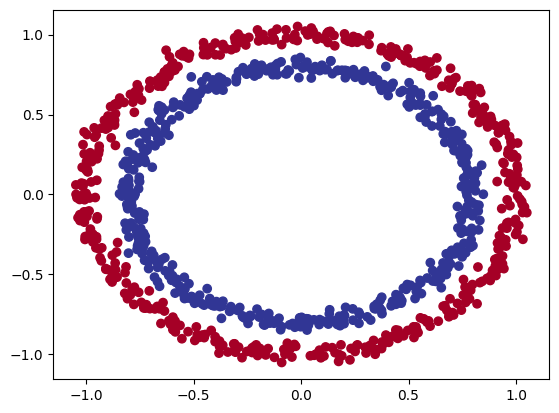

In [34]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [35]:
X.shape, y.shape

((1000, 2), (1000,))

In [36]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [38]:
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [39]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [40]:
# class NonLinearModule(nn.Module):
#   def __init__(self, *args, **kwargs) -> None:
#     super().__init__(*args, **kwargs)

#     self.Layers = nn.Sequential(
#         nn.Linear(2, 32),
#         nn.LeakyReLU(),
#         nn.Linear(32, 1),
#     )

#   def forward(self, x : torch.Tensor) -> torch.Tensor:
#     return self.Layers(x)

# _Model = NonLinearModule()

# # Create a loss function
# # loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
# Loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# # Create an optimizer
# _Optimizer = torch.optim.SGD(params=_Model.parameters(),
#                             lr=0.15)
# _Epochs = 900

# # ReLU 90% accuracy: 300 epochs lr = 0.15
# # ReLU 90% accuracy: 430 epochs lr = 0.1
# # ReLU 90% accuracy: 830 epochs lr = 0.05
# # LeakyReLU 90% accuracy: 640 epochs lr = 0.1
# # ELU 90% accuracy: 890 epochs lr = 0.1

# for i in range(_Epochs):
#   _Model.train()

#   y_logits = _Model(X_train).squeeze() # To Remove Extra Dimension
#   Loss = Loss_fn(y_logits, y_train)

#   y_pred = torch.round(torch.sigmoid(y_logits))

#   acc = accuracy_fn(y_pred=y_pred, y_true=y_train)

#   # 3. Optimizer zero grad
#   _Optimizer.zero_grad()

#   # 4. Loss backwards
#   Loss.backward()

#   # 5. Optimizer step
#   _Optimizer.step()

#   ### Testing
#   _Model.eval()
#   with torch.inference_mode():
#       # 1. Forward pass
#       test_logits = _Model(X_test).squeeze()
#       test_pred = torch.round(torch.sigmoid(test_logits))
#       # 2. Caculate loss/accuracy
#       test_loss = Loss_fn(test_logits,
#                           y_test)
#       test_acc = accuracy_fn(y_true=y_test,
#                               y_pred=test_pred)

#   # Print out what's happening every 10 epochs
#   if i % 10 == 0:
#       print(f"Epoch: {i} | Loss: {Loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc}")

In [41]:

# from sklearn.datasets import make_blobs
# from sklearn.model_selection import train_test_split

# # Set the hyperparameters for data creation
# NUM_CLASSES = 4
# NUM_FEATURES = 2
# RANDOM_SEED = 32

# # 1. Create multi-class data
# X_blob, y_blob = make_blobs(n_samples=1000,
#     n_features=NUM_FEATURES, # X features
#     centers=NUM_CLASSES, # y labels
#     cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
#     random_state=RANDOM_SEED
# )

# # 2. Turn data into tensors
# X_blob = torch.from_numpy(X_blob).type(torch.float)
# y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
# print(X_blob[:5].shape, y_blob[:5])

# # 3. Split into train and test sets
# X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
#     y_blob,
#     test_size=0.2,
#     random_state=RANDOM_SEED
# )

# # 4. Plot data
# plt.figure(figsize=(10, 7))
# plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [42]:
# class MultiClassificationModule(nn.Module):
#   def __init__(self, *args, **kwargs) -> None:
#      super().__init__(*args, **kwargs)

#      self.Layers = nn.Sequential(
#         nn.Linear(2, 8),
#         # nn.ReLU(),
#         nn.Linear(8, 16),
#         nn.Linear(16, 4),
#      )

#   def forward(self, x : torch.Tensor) -> torch.Tensor:
#     return self.Layers(x)


# _Model2 = MultiClassificationModule()
# Loss_Fn = nn.CrossEntropyLoss()

# _Optimizer = torch.optim.SGD(_Model2.parameters(), lr=0.01)
# _Epochs = 100
# torch.manual_seed(32)

# for i in range(_Epochs):
#   _Model2.train()

#   y_logits = _Model2(X_blob_train)
#   y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

#   # print(y_logits[:5], y_pred[:5])

#   Loss = Loss_Fn(y_logits, y_blob_train)
#   train_acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

#   _Optimizer.zero_grad()

#   Loss.backward()

#   _Optimizer.step()

#   _Model2.eval()

#   with torch.inference_mode():
#     # 1. Forward pass
#       test_logits = _Model2(X_blob_test)
#       test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
#       # 2. Calculate test loss and accuracy
#       test_loss = Loss_Fn(test_logits, y_blob_test)
#       test_acc = accuracy_fn(y_true=y_blob_test,
#                              y_pred=test_pred)

#     # Print out what's happening
#       if i % 10 == 0:
#         print(f"Epoch: {i} | Loss: {Loss:.5f}, Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc}")


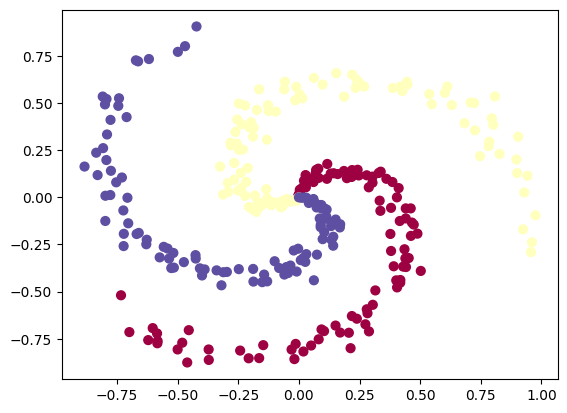

In [57]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state = 32
)

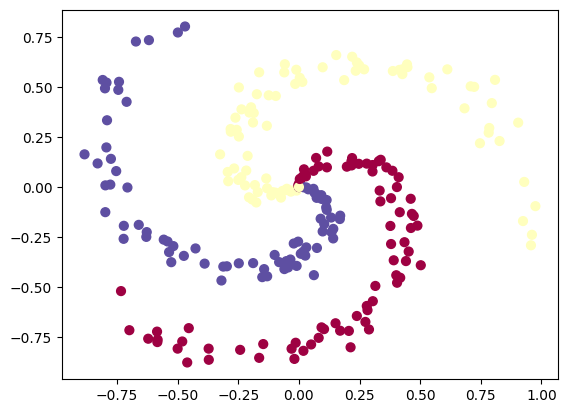

(torch.Size([240, 2]),
 torch.Size([60, 2]),
 torch.Size([240]),
 torch.Size([60]),
 torch.Size([2]))

In [58]:
# lets visualize the data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:], s=40, cmap=plt.cm.Spectral)
plt.show()

X_train.shape, X_test.shape, y_train.shape, y_test.shape , X_train[0].shape

In [65]:
class SpiralModule(nn.Module):
  def __init__(self, in_units : int, hidden_units : int, out_units : int) -> None:
     super().__init__()

     self.Layers = nn.Sequential(
        nn.Linear(in_features=in_units, out_features=int(hidden_units/2)),
        nn.ReLU(),
        nn.Linear(in_features=int(hidden_units/2), out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_units),
     )

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.Layers(x)

In [66]:
_Model = SpiralModule(2, 16, 3)
_Model

SpiralModule(
  (Layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=3, bias=True)
  )
)

In [67]:
torch.manual_seed(32)

Loss_Fn = nn.CrossEntropyLoss()

_Optimizer = torch.optim.SGD(_Model.parameters(), lr=0.1)

In [73]:
_Epochs = 1000

for i in range(_Epochs):
  _Model.train()

  y_logits = _Model(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  Loss = Loss_Fn(y_logits, y_train)
  train_acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  _Optimizer.zero_grad()

  Loss.backward()

  _Optimizer.step()

  _Model.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = _Model(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Calculate test loss and accuracy
    test_loss = Loss_Fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if i % 10 == 0:
      print(f"Epoch: {i} | Loss: {Loss:.5f}, Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc}")
y_logits = _Model(X_test)

y_pred_prob = torch.softmax(y_logits, dim=1).argmax(dim=1)

y_pred_prob, y_test

Epoch: 0 | Loss: 0.03669, Acc: 99.17% | Test Loss: 0.04063, Test Acc: 100.0
Epoch: 10 | Loss: 0.03662, Acc: 99.17% | Test Loss: 0.04073, Test Acc: 100.0
Epoch: 20 | Loss: 0.03654, Acc: 99.17% | Test Loss: 0.04080, Test Acc: 100.0
Epoch: 30 | Loss: 0.03647, Acc: 99.17% | Test Loss: 0.04088, Test Acc: 100.0
Epoch: 40 | Loss: 0.03640, Acc: 99.17% | Test Loss: 0.04096, Test Acc: 100.0
Epoch: 50 | Loss: 0.03632, Acc: 99.17% | Test Loss: 0.04105, Test Acc: 100.0
Epoch: 60 | Loss: 0.03625, Acc: 99.17% | Test Loss: 0.04113, Test Acc: 100.0
Epoch: 70 | Loss: 0.03618, Acc: 99.17% | Test Loss: 0.04118, Test Acc: 100.0
Epoch: 80 | Loss: 0.03611, Acc: 99.17% | Test Loss: 0.04127, Test Acc: 100.0
Epoch: 90 | Loss: 0.03604, Acc: 99.17% | Test Loss: 0.04135, Test Acc: 100.0
Epoch: 100 | Loss: 0.03597, Acc: 99.17% | Test Loss: 0.04143, Test Acc: 100.0
Epoch: 110 | Loss: 0.03590, Acc: 99.17% | Test Loss: 0.04151, Test Acc: 100.0
Epoch: 120 | Loss: 0.03583, Acc: 99.17% | Test Loss: 0.04159, Test Acc: 100

(tensor([2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0,
         1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0,
         1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1]),
 tensor([2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0,
         1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0,
         1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1]))

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plt.plot(_Model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)